In [35]:
import pandas as pd
import json
from pprint import pprint
import glob

In [36]:
def readStubHubJSON(inJSON):
    json_data=open(inJSON).read()
    data = json.loads(json_data)
    
    columns = ['scrapedatetime','showdate','totaltix','lowTicketPrice','lowWFees']
    df = pd.DataFrame(columns=columns) #create empty dataframe with fields
    
    totaltix       = data["eventTicketListing"]["totalTickets"]
    lowTicketPrice = data["eventTicketListing"]["eventTicket"][0]["cp"]
    lowTicketWFees = data["eventTicketListing"]["eventTicket"][0]["tc"]["amount"]
    #print totaltix, lowTicketPrice, lowTicketWFees
    x = [totaltix, lowTicketPrice, lowTicketWFees]
    return x

In [37]:
eventList = ['9394538', '9394539', '9394540', '9394541']
dateList  = ['20151230','20151231','20160101','20160102']
dateLabelList  = ['2015-12-30','2015-12-31 New Years','2016-01-01','2016-01-02']

columns = ['datetime','showdate','datelabel','totaltix','lowTicketPrice','lowTicketWFees']
df = pd.DataFrame(columns=columns) #create empty dataframe with fields
    
for date, dateLabel in zip(dateList, dateLabelList):
    
    totaltixList       = []
    lowTicketPriceList = []
    lowTicketWFeesList = []
    ticketData = []
    wd = 'data/'
    jsonFilesList = glob.glob(wd+'ph'+date+'*.json') #use glob * for ticketdate
    
    for jsonFile in jsonFilesList: 
        #print jsonFile
        ioJSON = jsonFile
        ticketData.append([jsonFile[24:32]+' '+jsonFile[32:34]+':'+jsonFile[34:36]]+[date]+[dateLabel]+readStubHubJSON(ioJSON))
        #print ticketData
    dfA = pd.DataFrame(ticketData) 
    dfA.columns = [columns]
    df = df.append([dfA])
    
print df.head(10)

         datetime  showdate   datelabel  totaltix  lowTicketPrice  \
0  20151002 14:53  20151230  2015-12-30       218          125.00   
1  20151002 14:58  20151230  2015-12-30       218          125.00   
2  20151002 15:17  20151230  2015-12-30       224          110.00   
3  20151002 19:17  20151230  2015-12-30       254          125.00   
4  20151002 23:17  20151230  2015-12-30       264          119.99   
5  20151003 03:17  20151230  2015-12-30       264          119.99   
6  20151003 07:17  20151230  2015-12-30       264          119.99   
7  20151003 11:17  20151230  2015-12-30       270          119.99   
8  20151003 15:17  20151230  2015-12-30       272          119.99   
9  20151003 19:17  20151230  2015-12-30       271          119.99   

   lowTicketWFees  
0          148.50  
1          148.50  
2          133.95  
3          148.50  
4          145.64  
5          145.64  
6          145.64  
7          145.64  
8          145.64  
9          145.64  


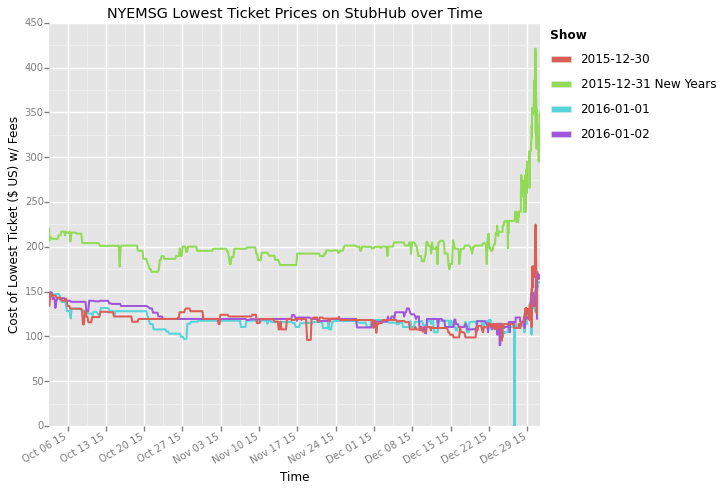

<ggplot: (283322685)>

In [38]:
%matplotlib inline

from ggplot import *
from ggplot import aes
from ggplot import meat

df['Cost of Lowest Ticket ($ US) w/ Fees'] = df['lowTicketWFees']
df['show'] = df['datelabel']
df['Time'] = pd.to_datetime(df['datetime'])

#ToDo: add datetime to title
plot = ggplot(aes(x='Time', y='Cost of Lowest Ticket ($ US) w/ Fees', colour='show'), data=df) + geom_line() \
+ ggtitle("NYEMSG Lowest Ticket Prices on StubHub over Time") \
+ scale_x_date(labels='%b %d %y',breaks=date_breaks('week') ) \
+ geom_line(size=2.) 


plot

In [ ]:
#ggsave(plot, "ph_nyemsg_prices_stubhub20151007.png")

#ToDo: a plot of count of tickets available by show (similar to above, but count, not prices) chart

In [59]:
# theURL = 'https://dms2203.cartodb.com/api/v2/sql?filename=beh_walkability_ct2010.csv&format=csv&q=SELECT geoid,t10walkc FROM ct10 WHERE t10walkc <= 4 '

# theFile = 'test2.csv'

# import urllib
# urllib.urlretrieve(theURL, theFile)

# df = pd.read_csv(theFile)

# #df

In [14]:

#print 'total tickets: ' + str(totaltix)
#print lowTicketPrice
#print lowTicketWFees

# "tc": {
#           "amount": 133.95,
#           "currency": "USD"
#         },
#         "fv": null,
#         "la": null,
#         "li": null,
#         "dm": null,
#         "dt": [
#           5
#         ],
#         "pm": {
#           "amount": 110,
#           "currency": "USD"
#         },

total tickets: 224
110.0
133.95
